In [2]:
# Global imports and settings
from preamble import *
%matplotlib inline
plt.rcParams['figure.dpi'] = 100 # Use 300 for PDF, 100 for slides
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Lecture 2: Fundamental Algorithms
Joaquin Vanschoren, Eindhoven University of Technology

## The Mathematics behind Machine Learning
* To understand machine learning algorithms, it often helps to describe them mathematically.
* To avoid confusion, let's specify a precise notation

### Basic notation
* A _scalar_ is a simple numeric value, denoted by italic letter: $x=3.24$
* A _vector_ is a 1D ordered array of _n_ scalars, denoted by bold letter: $\mathbf{x}=[3.24, 1.2]$
    * A vector can represent a _point_ in an n-dimensional space, given a _basis_.
    * $x_i$ denotes the $i$th element of a vector, thus $x_0 = 3.24$.
        * Note: some other courses use $x^{(i)}$ notation
* A _set_ is an _unordered_ collection of unique elements, denote by caligraphic capital: $\mathcal{S}=\{3.24, 1.2\}$
* A _matrix_ is a 2D array of scalars, denoted by bold capital: $\mathbf{X}=\begin{bmatrix}
3.24 & 1.2 \\
2.24 & 0.2 
\end{bmatrix}$
    * It can represent a set of points in an n-dimensional space, given a _basis_.
    * $\textbf{X}_{i}$ denotes the $i$th _row_ of the matrix
    * $\textbf{X}_{i,j}$ denotes the _element_ in the $i$th row, $j$th column, thus $\mathbf{X}_{0,1} = 2.24$
* The _standard basis_ for a Euclidean space is the set of unit vectors
    * Data can also be represented in a non-standard basis (e.g. polynomials) if useful 

* A _tensor_ is an _k_-dimensional array of data, denoted by an italic capital: $T$
    * _k_ is also called the _order_, _degree_, or _rank_
    * $T_{i,j,k,...}$ denotes the element or sub-tensor in the corresponding position
    * A set of color images can be represented by:
        * a 4D tensor (sample x height x weight x color channel)
        * a 2D tensor (sample x flattened vector of pixel values)
    
<img src="../images/08_images.png" alt="ml" style="width: 40%;"/>

### Basic operations
* Sums and products are denoted by capital Sigma and capital Pi:
$$\sum_{i=0}^{n} = x_0 + x_1 + ... + x_p \quad \prod_{i=0}^{n} = x_0 \cdot x_1 \cdot ... \cdot x_p$$
* Operations on vectors are _element-wise_: e.g. $\mathbf{x}+\mathbf{z} = [x_0+z_0,x_1+z_1, ... , x_p+z_p]$
* Dot product $\mathbf{w}\mathbf{x} = \mathbf{w} \cdot \mathbf{x} = \sum_{i=0}^{p} w_i \cdot x_i = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_p \cdot x_p$
* Matrix product $\mathbf{W}\mathbf{x} = \begin{bmatrix}
\mathbf{w_0} \cdot \mathbf{x} \\
... \\
\mathbf{w_p} \cdot \mathbf{x} \end{bmatrix}$
* A function $f(x) = y$ relates an input element $x$ to an output $y$
    * It has a _local minimum_ at $x=c$ if $f(x) \geq f(c)$ in interval $(c-\epsilon, c+\epsilon)$
    * It has a _global minimum_ at $x=c$ if $f(x) \geq f(c)$ for any value for $x$
* A vector function consumes an input and produces a vector: $\mathbf{f}(\mathbf{x}) = \mathbf{y}$
* $\underset{x\in X}{\operatorname{max}}f(x)$ returns the highest value f(x) for any x
* $\underset{c\in C}{\operatorname{argmax}}f(x)$ returns the element c that maximizes f(c)

### Gradients
* A _derivative_ $f'$ of a function $f$ describes how fast $f$ grows or decreases
* The process of finding a derivative is called differentiation
    * Derivatives for basic functions are known
    * For non-basic functions we use the _chain rule_: $F(x) = f(g(x)) \rightarrow F'(x)=f'(g(x))g'(x)$
* A function is _differentiable_ if it has a derivate in any point of it's domain
    * It's _continuously differentiable_ if $f'$ is itself a function
    * It's _smooth_ if $f', f'', f''', ...$ all exist
* A _gradient_ $\nabla f$ is the derivate of a function in multiple dimensions
    * It is a vector of _partial derivatives_: $\nabla f = \left[ \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1},... \right]$
    * E.g. $f=2x_0+3x_1^{2}-\sin(x_2) \rightarrow \nabla f= [2, 6x_1, -cos(x_2)]$

### Probabilities
* A random variable $X$ can be continuous or discrete
* A probability distribution of a discrete variable is the list of probabilities for each possible value
    * Also called the _probability mass function_ (_pmf_)
    * The _expectation_ (or _mean_) $\mathbb{E}[X] = \mu_X = \sum_{i=1}^k[x_i \cdot Pr(X=x_i)]$
    * The standard deviation $\sigma = \sqrt{\mathbb{E}[(X-\mu)^2]}$ and variance $var(X) = \sigma^2$
* A probability distribution $f_X$ of a continuous variable $X$ is described by a _probability density function_ (_pdf_)
    * The _expectation_ is given by $\mathbb{E}[X] = \int_{\mathbb{R}} x f_X(x) dx$
   
<img src="../images/02_pdf.png" alt="ml" style="width: 50%;"/>

* $f_x$ is usually unknown, we only have a sample of the data $S_X = \{x_i\}_{i=1}^N$
* An _unbiased estimator_ $\hat{\theta}(S_X)$ of some statistic $\theta$ calculated using a sample $(S_X)$ drawn from its unknown probability distribution has the property $\mathbb{E}[\hat{\theta}(S_X)]=\theta$
    * It can be shown that the _sample mean_ $\frac{\sum_{i=1}^N x_i}{N}$ is an unbiased estimator of an unknown $\mathbb{E}[X]$

# k-Nearest Neighbor

* Building the model consists only of storing the training dataset. 
* To make a prediction, the algorithm finds the _k_ closest data points in the training dataset

## k-Nearest Neighbor Classification
Find nearest neighbors, do a vote, return the majority (or a confidence value for each class)

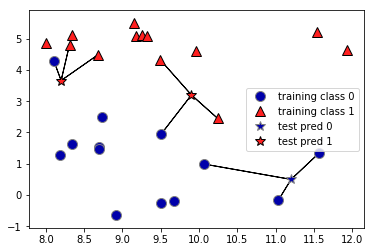

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Let's build a kNN model (on dataset 'Forge')

``` python
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=19)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
```

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=19)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

In [22]:
print("Test set accuracy: %.2f" % clf.score(X_test, y_test))

Test set accuracy: 0.43


#### Analysis
We can plot the prediction for each possible input to see the _decision boundary_

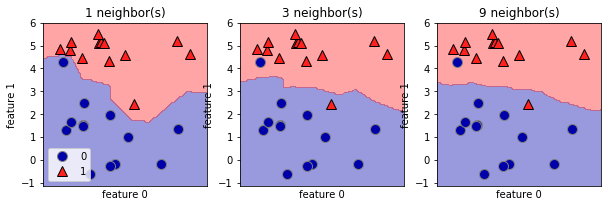

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
_ = axes[0].legend(loc=3)

Using few neighbors corresponds to high model complexity (left), and using many neighbors corresponds to low model complexity and smoother decision boundary (right).

We can more directly measure the effect on the training and test error on a larger dataset (breast_cancer)
* It first overfits, then underfits
* Tune the number of neighbors to your dataset to find the sweet spot

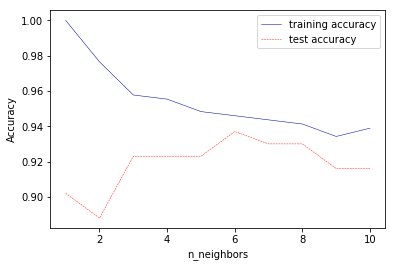

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Build a list of the training and test scores for increasing k
training_accuracy = []
test_accuracy = []
k = range(1, 11)

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
_ = plt.legend()

For small numbers of neighbors, the model is too complex, and overfits the training data. As more neighbors are considered, the model becomes simpler and the training accuracy drops, yet the test accuracy increases, up to a point. After about 8 neighbors, the model starts becoming too simple (underfits) and the test accuracy drops again.

## k-Neighbors Regression
Return the _mean_ of the target values of the _k_ nearest neighbors

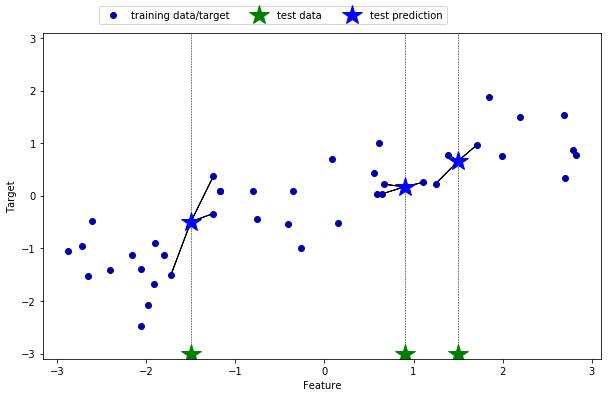

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

To do regression, simply use `KNeighborsRegressor` instead

``` python
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
```

In [27]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model, set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

The default scoring function for regression models is $R^{2}$. It measures how much of the data variability is explained by the model, relative to just predicting the mean. Usually between 0 and 1 (<0 means you predictions are worse than just predicting the mean).

```python
reg.predict(X_test)
reg.score(X_test, y_test)
```

In [28]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [29]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Analysis
We can again output the predictions for each possible input, for different values of _k_.

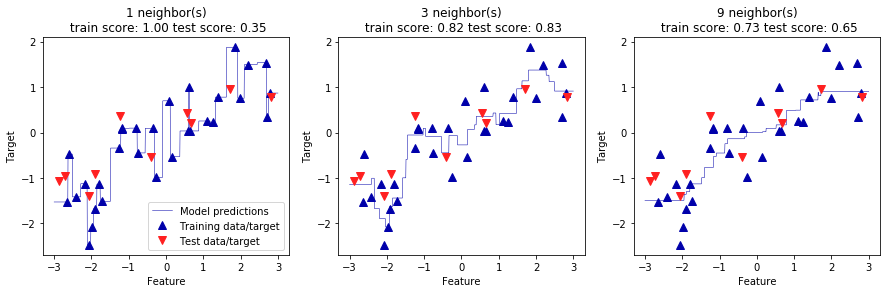

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
_ = axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

We see that again, a small _k_ leads to an overly complex (overfitting) model, while a larger _k_ yields a smoother fit.

## kNN: Strengths, weaknesses and parameters
* There are two important hyperparameters:
    * n_neighbors: the number of neighbors used
    * metric: the distance measure used
        * Default is Minkowski (generalized Euclidean) distance.
* Easy to understand, works well in many settings
* Training is very fast, predicting is SLOW for large datasets
* Bad at high-dimensional and sparse data (curse of dimensionality)

# Linear models
Linear models make a prediction using a linear function of the input features. Can be very powerful for or datasets with many features. 

If you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function.

## Linear models for regression
Prediction formula for input features x. $w_i$ and b are the _model parameters_ that need to be learned.  

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b$

There are many different algorithms, differing in how w and b are learned from the training data.

w[0]: 0.393906  b: -0.031804


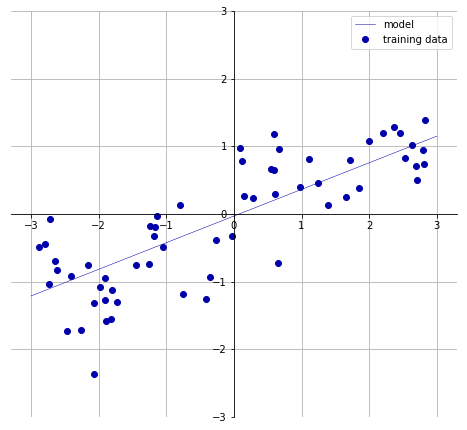

In [31]:
mglearn.plots.plot_linear_regression_wave()

### Linear Regression aka Ordinary Least Squares
* Finds the parameters w and b that minimize the _mean squared error_ between predictions and the true regression targets, y, on the training set. 
    * MSE: Sum of the squared differences between the predictions and the true values.
* It has no hyperparameters, thus model complexity cannot be controlled.

<img src="../images/02_least_squares.png" alt="ml" style="width: 600px;"/>

Linear regression can be found in `sklearn.linear_model`. We'll evaluate it on the Boston Housing dataset.

``` python
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
```

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

Has many large coefficients: sign of overfitting!

In [33]:
print("Weights (coefficients): {}".format(lr.coef_)) 

Weights (coefficients): [ -412.711   -52.243  -131.899   -12.004   -15.511    28.716    54.704
   -49.535    26.582    37.062   -11.828   -18.058   -19.525    12.203
  2980.781  1500.843   114.187   -16.97     40.961   -24.264    57.616
  1278.121 -2239.869   222.825    -2.182    42.996   -13.398   -19.389
    -2.575   -81.013     9.66      4.914    -0.812    -7.647    33.784
   -11.446    68.508   -17.375    42.813     1.14     -0.773    56.826
    14.288    53.955   -32.171    19.271   -13.885    60.634   -12.315
   -12.004   -17.724   -33.987     7.09     -9.225    17.198   -12.772
   -11.973    57.387   -17.533     4.101    29.367   -17.661    78.405
   -31.91     48.175   -39.534     5.23     21.998    25.648   -49.998
    29.146     8.943   -71.66    -22.815     8.407    -5.379     1.201
    -5.209    41.145   -37.825    -2.672   -25.522   -33.398    46.227
   -24.151   -17.753   -13.972   -23.552    36.835   -94.689   144.303
   -15.116   -14.951   -28.773   -31.767    24.955   

### Ridge regression
* Same formula as linear regression
* Adds a penalty term to the least squares sum : $\alpha \sum_{i} w_i^2$
* Requires that the coefficients (w) are close to zero.
    * Each feature should have as little effect on the outcome as possible 
* Regularization: explicitly restrict a model to avoid overfitting. 
* Type of L2 regularization: prefers many small weights
    * L1 regularization prefers sparsity: many weights to be 0, others large

`Ridge` can also be found in `sklearn.linear_model`.  
`ridge = Ridge().fit(X_train, y_train)`

In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Test set score is higher and training set score lower: less overfitting!

The strength of the regularization can be controlled with the `alpha` parameter. Default is 1.0.
* Increasing alpha forces coefficients to move more toward zero (more regularization)
* Decreasing alpha allows the coefficients to be less restricted (less regularization)
* Optimize alpha for your dataset

In [7]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

@interact
def plot_my_ridge(alpha=(0.1,10.0,0.1)):
    r = Ridge(alpha=alpha).fit(X_train, y_train)
    plt.plot(r.coef_, 'o')
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.hlines(0, 0, len(r.coef_))
    plt.ylim(-25, 25);
    plt.xlim(0, 50);

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, min=0.1), Output()), _dom_classes=…

### Lasso
* Another form of regularization
* Adds a penalty term to the least squares sum : $\alpha \sum_{i} |w_i|$
* Prefers coefficients to be exactly zero (L1 regularization).
* Some features are entirely ignored by the model: automatic feature selection.
* Same parameter `alpha` to control the strength of regularization. 
* Weights are optimized using _gradient descent_
* New parameter `max_iter`: the maximum number of _gradient descent_ iterations
    * Should be higher for small values of `alpha`

* Run Lasso using the `Lasso` estimator
* Tune the alpha (and max_iter) to your dataset

``` python
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
```

In [35]:
from sklearn.linear_model import Lasso

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("alpha={0}, max_iter={1}".format(lasso001.get_params()['alpha'],lasso001.get_params()['max_iter']))
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

alpha=0.01, max_iter=100000
Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [6]:
from sklearn.linear_model import Lasso

@interact
def plot_my_lasso(alpha=(0.001,1.0,0.01)):
    r = Lasso(alpha=alpha).fit(X_train, y_train)
    plt.plot(r.coef_, 'o')
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.hlines(0, 0, len(r.coef_))
    plt.ylim(-25, 25);
    plt.xlim(0, 50);

interactive(children=(FloatSlider(value=0.491, description='alpha', max=1.0, min=0.001, step=0.01), Output()),…

#### Linear models for Classification
Aims to find a (hyper)plane that separates the examples of each class.  
For binary classification (2 classes), we aim to fit the following function: 

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b > 0$  
    
When $\hat{y}<0$, predict class -1, otherwise predict class +1

##### Logistic regression
The logistic model uses the _logistic_ (or _sigmoid_) function to estimate the probability that a given sample belongs to class 1:
$$ z = f(x) = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p $$
$$ \hat{y} = Pr[1|x_1,...,x_k] = g(z) = \frac{1}{1+e^{-z}} $$
<img src="../images/01_logistic.png" alt="ml" style="width: 600px;"/>

##### Linear Support Vector Machine
Find hyperplane maximizing the _margin_ between the classes  
<img src="../images/01_svm.png" alt="ml" style="width: 600px;"/>
Prediction is identical to weighted kNN: find the support vector that is nearest, according to a distance measure (kernel) and a weight for each support vector.

* Logistic regression can be run with `linear_model.LogisticRegression`
* Linear SVMs can be run with `svm.LinearSVC`

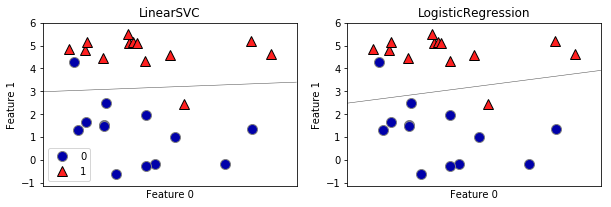

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend();

Both methods can be regularized:
* L2 regularization by default, L1 also possible
* _C_ parameter: inverse of strength of regularization
    * higher _C_: less regularization
    * penalty for misclassifying points while keeping $w_i$ close to 0
    
`logreg = LogisticRegression(C=1,penalty=l2).fit(X_train, y_train)`

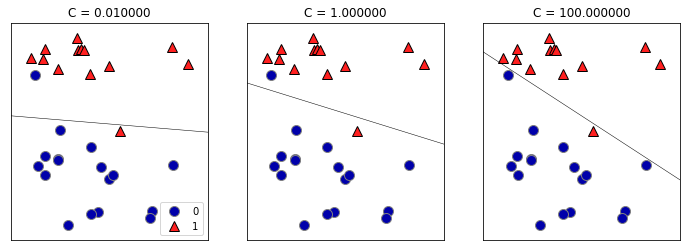

In [37]:
mglearn.plots.plot_linear_svc_regularization()

## Kernelized Support Vector Machines

* Linear models work well in high dimensional spaces.
* You can _create_ additional dimensions yourself.
* Let's start with an example.

Our linear model doesn't fit the data well

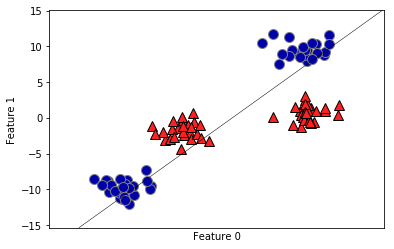

In [38]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import LinearSVC
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

We can add a new feature by taking the squares of feature1 values

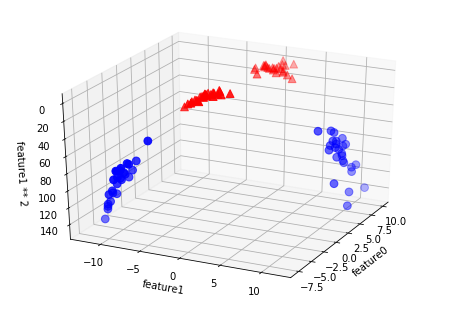

In [39]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

We can now fit a linear model

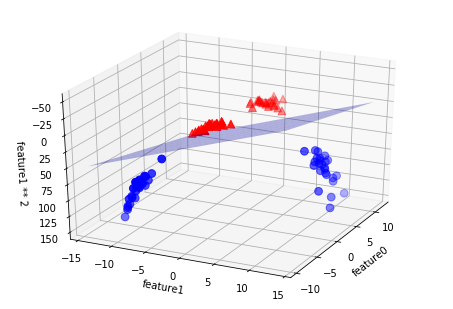

In [40]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

As a function of the original features, the linear SVM model is not actually linear anymore, but more of an ellipse

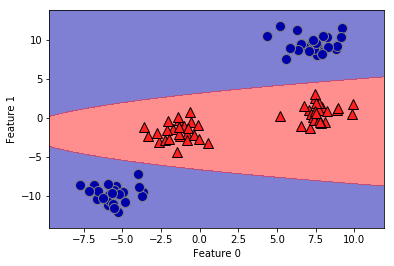

In [41]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1"); 

### Kernels

A (Mercer) Kernel on a space X is a (similarity) function  

$k: X \times X \rightarrow \mathbb{R}$

Of two arguments with the properties: 

- Symmetry: $k(x_1,x_2) = k(x_2,x_1) \,\,\, \forall x_1,x_2 \in X$
- Positive definite: for each finite subset of data points ${x_1,...,x_n}$, the kernel Gram matrix is positive semi-definite

Kernel matrix = $K \in \mathbb{R}^{n \times n}$ with $K_{ij} = k(x_i,x_j)$

#### Kernels: examples

- The inner product is a kernel. The standard inner product is the __linear kernel__:  
$k(x_1,x_2) = x_1^T x_2$

- Kernels can be constructed from other kernels $k_1$ and $k_2$:
    - For $\lambda \geq 0, \lambda . k_1$ is a kernel
    - $k_1 + k_2$ is a kernel
    - $k_1 . k_2$ is a kernel (thus also $k_1^n$)
- This allows to construct the __polynomial kernel__:  
$k(x_1,x_2) = (x_1^T x_2 + b)^d$, for $b \geq 0$ and $d \in \mathbb{N}$ 

- The 'radial base fucntion' (or __Gaussian__) kernel is defined as:  
$k(x_1,x_2) = exp(-\gamma ||x_1 - x_2||^2)$, for $\gamma \geq 0$ 
<img src="../images/05_gaussian_curves.png" alt="ml" style="width: 600px;"/>

Different kernels lead to different decision boundaries, because the distance to the support vectors is measured differently.

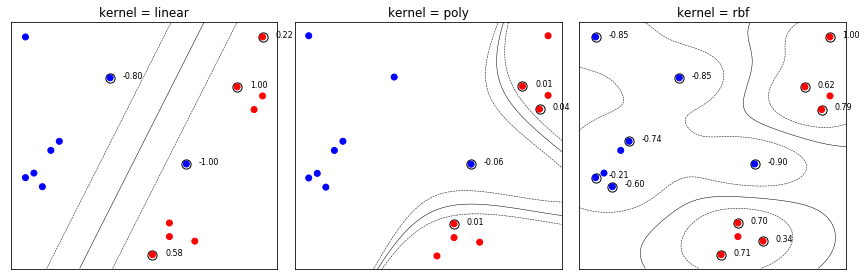

In [42]:
mglearn.plots.plot_svm_kernels()

The first important hyperparameter to tune is the choice of kernel
* RBF is _usually_ best

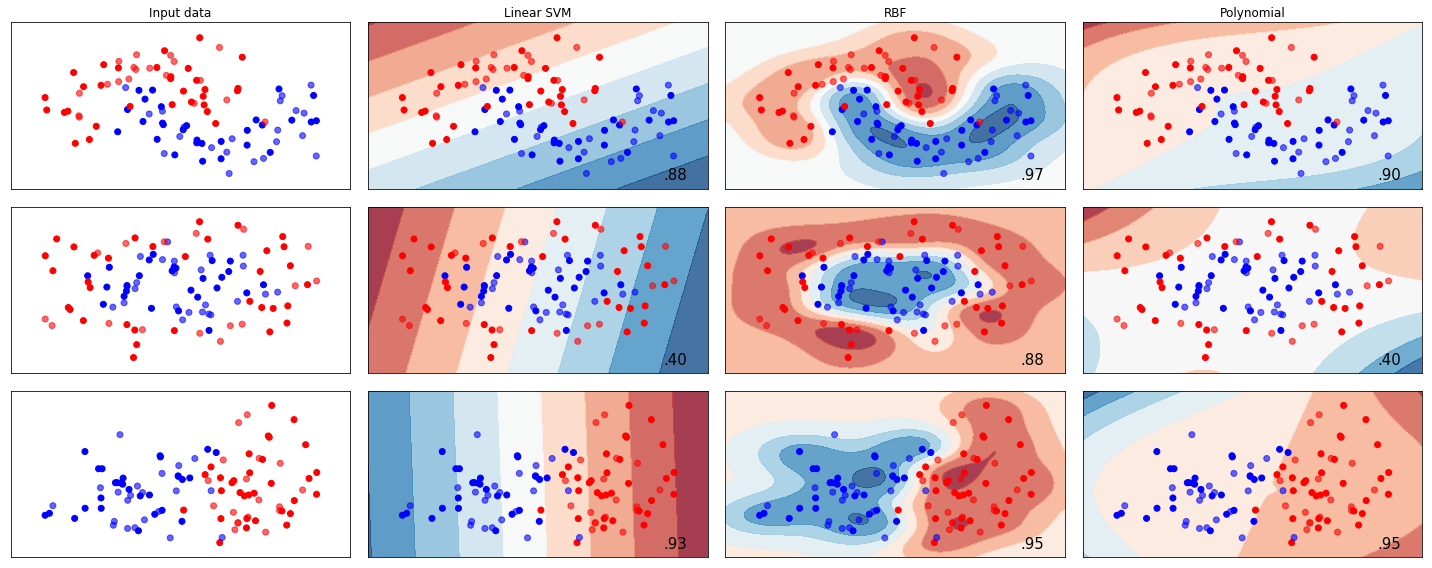

In [43]:
from sklearn.svm import SVC
import plot_classifiers
names = ["Linear SVM", "RBF", "Polynomial"]

classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", degree=3, C=0.1)
    ]
 
plot_classifiers.plot_classifiers(names, classifiers, figuresize=(20,8)) 

But also:
- the amount of regulatization ('C')
    - Too low: underfitting, Too high: overfitting
- the hyperparameters of the kernel itself, e.g. 'gamma'
    - Too low: underfitting, Too high: overfitting

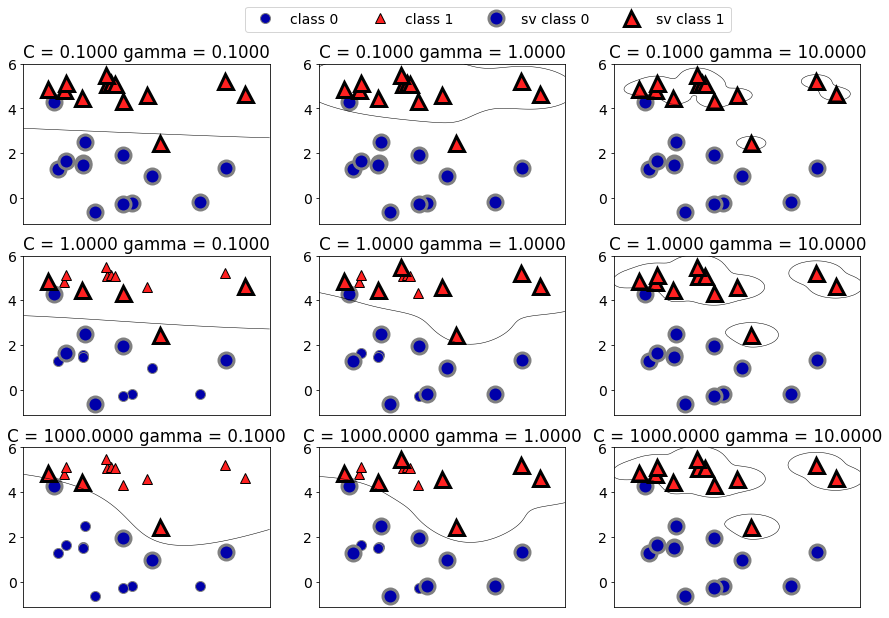

In [44]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2));

### SVMs: Strengths, weaknesses and parameters

* SVMs allow complex decision boundaries, even with few features. 
* Work well on both low- and high-dimensional data

* Don't scale very well to large datasets (>100000)
* Require careful preprocessing of the data and tuning of the parameters. 
* SVM models are hard to inspect

Important parameters:
* regularization parameter _C_
* choice of the kernel and kernel-specific parameters
    * Typically string correlation with _C_

## Decision Trees
* Split the data in two (or more) parts
* Search over all possible splits and choose the one that is most _informative_
    * Many heuristics
    * E.g. _information gain_: how much does the entropy of the class labels decrease after the split (purer 'leafs')
* Repeat recursive partitioning

* In scikit-learn: `tree.DecisionTreeClassifier`

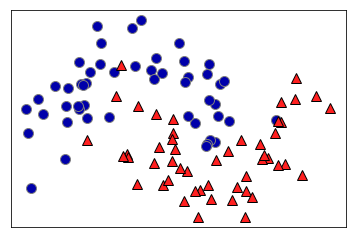

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
plt.figure()
ax = plt.gca()
mglearn.tools.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
ax.set_xticks(())
ax.set_yticks(());

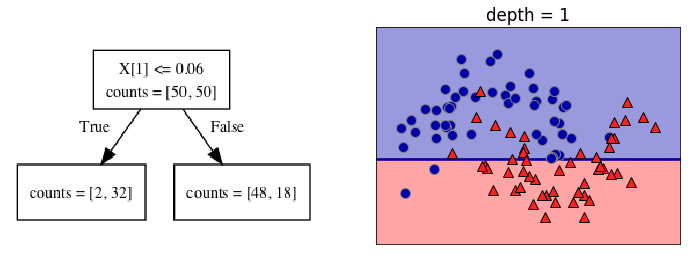

In [46]:
def plot_depth(depth):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                           subplot_kw={'xticks': (), 'yticks': ()})

    tree = mglearn.plots.plot_tree(X, y, max_depth=depth)
    ax[0].imshow(mglearn.plots.tree_image(tree))
    ax[0].set_axis_off()
plot_depth(1)

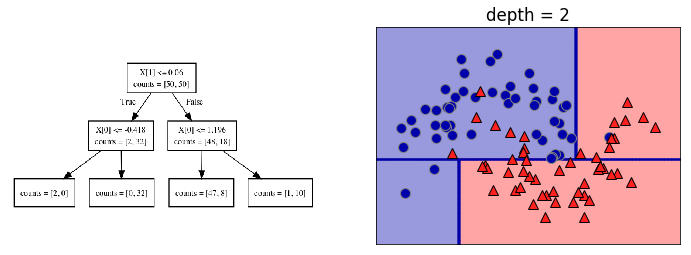

In [47]:
plot_depth(2)

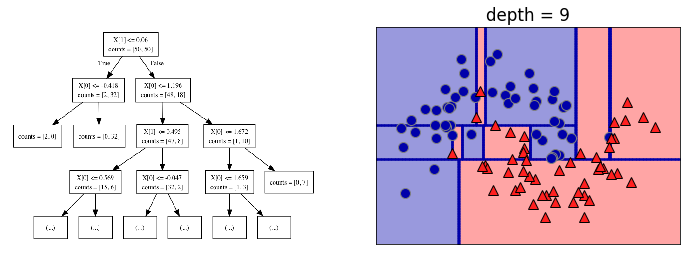

In [48]:
plot_depth(9)

### Overfitting: Controlling complexity of Decision Trees
Decision trees can very easily overfit the data. Regularization strategies:  

* Pre-pruning: stop creation of new leafs at some point
    * Limiting the depth of the tree, or the number of leafs
         - Use lower `max_depth`, `max_leaf_nodes`
    * Requiring a minimal leaf size (number of instances)
         - Use higher `min_samples_leaf` (default=1)

* Post-pruning: build full tree, then prune (join) leafs
    * Reduced error pruning: evaluate against held-out data
    * Many other strategies exist. 
    * scikit-learn supports none of them (yet)

## Decision trees for regression
* Heuristic: Minimal quadratic distance
* Consider splits at every data point for every variable
* Choose splits so that predicting the average of all leaf values gives the smallest error

In [49]:
def plot_decision_tree_regression(regr_1, regr_2):
    # Create a random dataset
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 3 * (0.5 - rng.rand(16))

    # Fit regression model
    regr_1.fit(X, y)
    regr_2.fit(X, y)

    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)

    # Plot the results
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, c="darkorange", label="data")
    plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
    plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

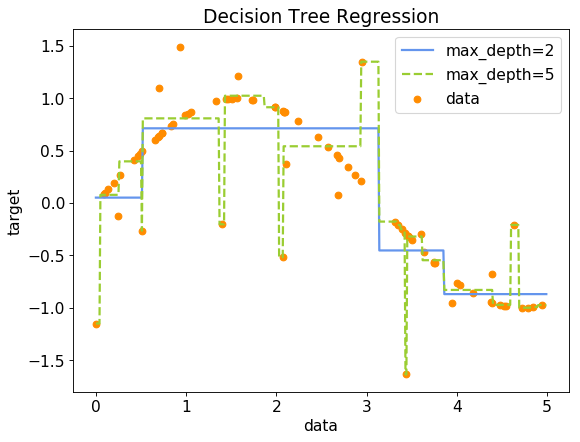

In [50]:
from sklearn.tree import DecisionTreeRegressor
plt.rcParams['figure.dpi'] = 80 
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

plot_decision_tree_regression(regr_1,regr_2)

#### Decision trees: Strengths, weaknesses and parameters
* Work well with features on completely different scales, or a mix of binary and continuous features
    * Does not require normalization
* Interpretable, easily visualized
* Do not extrapolate well
* Still tend to overfit easily. Use ensembles of trees.

## Ensemble learning
Ensembles are methods that combine multiple machine learning models to create more powerful models. Most popular are:

* __RandomForests__: Build randomized trees on random samples of the data
* __Gradient boosting machines__: Build trees iteratively, giving higher weights to the points misclassified by previous trees

In both cases, predictions are made by doing a vote over the members of the example.  
__Stacking__ is another technique that builds a (meta)model over the predictions of each member.

### RandomForests
Reduce overfitting by averaging out individual predictions (variance reduction)  
In scikit-learn: `ensemble.RandomForestClassifier`

* Take a _bootstrap sample_ of your data
    * Randomly sample with replacement
    * Build a tree on each bootstrap
* Repeat `n_estimators` times 
    * Higher values: more trees, more smoothing
    * Make prediction by aggrating the individual tree predictions
        * a.k.a. Bootstrap aggregating (Bagging)
* RandomForest: Randomize trees by considering only a random subset of features of size `max_features` _in each node_
    * Small `max_features` yields more different trees, more smoothing
    * Default: $sqrt(n\_features)$ for classification, $log2(n\_features)$ for regression


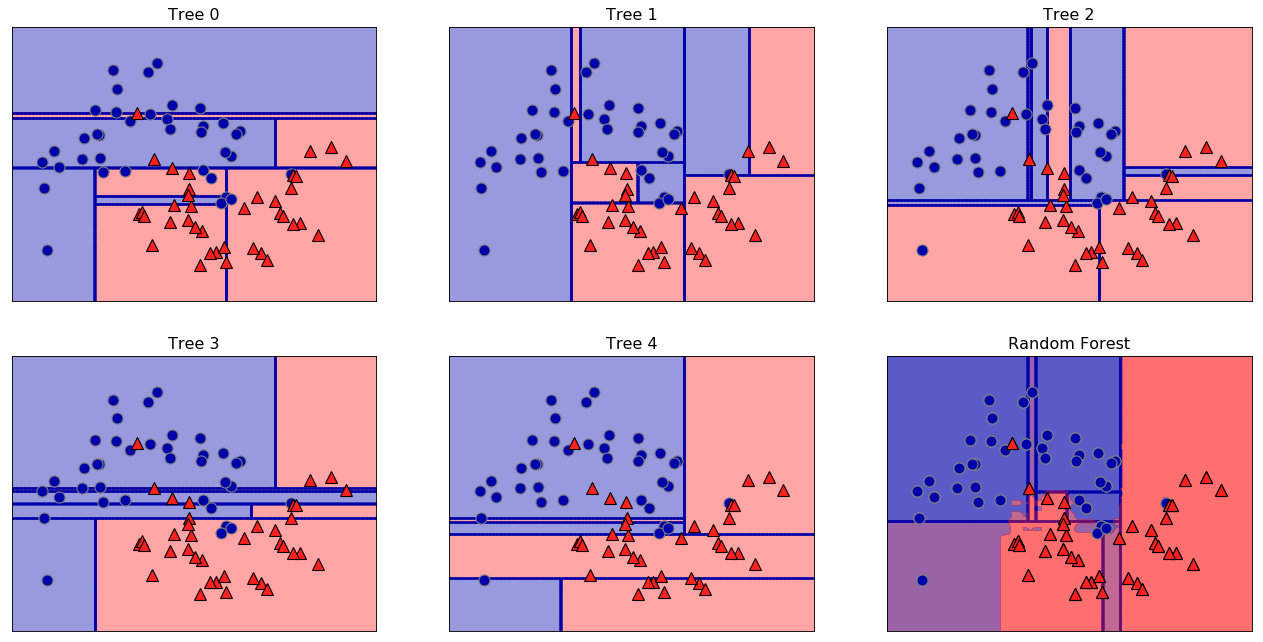

In [51]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train, y_train) 
 
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train);

## Gradient Boosting
Instead of reducing the variance of overfitted models, reduce the bias of underfitted models  
In scikit-learn: `ensemble.GradientBoostingClassifier`

* Use strong pre-pruning to build very shallow trees
    * Default `max_depth`=3
* Iteratively build new trees by increasing weights of points that were badly predicted
* Example of _additive modelling_: each tree depends on the outcome of previous trees
* Optimization: find optimal weights for all data points
    * Gradient descent (covered later) finds optimal set of weights
    * `learning rate` controls how strongly the weights are altered in each iteration (default 0.1)
* Repeat `n_estimators` times (default 100)

Example:
<img src="../images/04_boosting_0.png" alt="ml" style="width: 600px;"/>

After 1 iteration

- The simple decision tree divides space
- Misclassified points get higher weight (larger dots)

<img src="../images/04_boosting_1.png" alt="ml" style="width: 600px;"/>

After 3 iterations
<img src="../images/04_boosting_3.png" alt="ml" style="width: 600px;"/>

After 20 iterations
<img src="../images/04_boosting_20.png" alt="ml" style="width: 600px;"/>

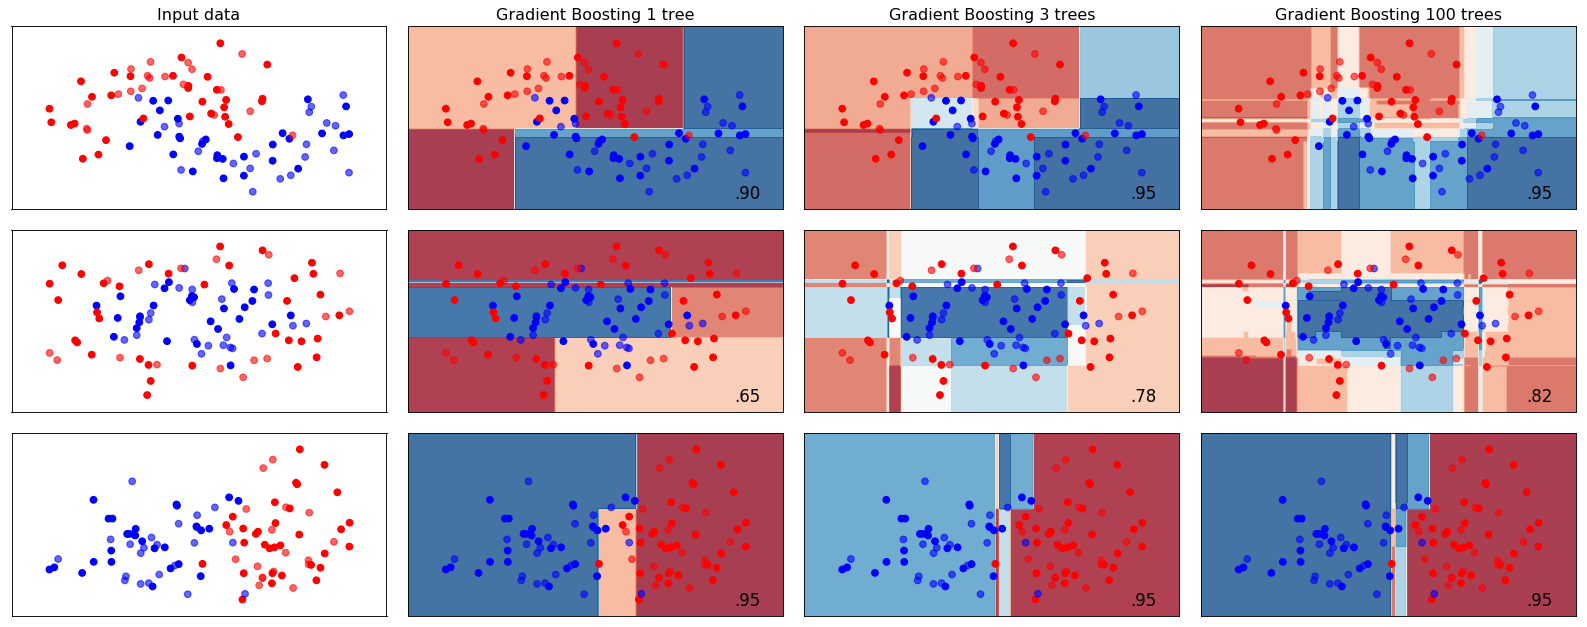

In [52]:
import plot_classifiers as pc
from sklearn.ensemble import GradientBoostingClassifier
names = ["Gradient Boosting 1 tree", "Gradient Boosting 3 trees", "Gradient Boosting 100 trees"]

classifiers = [
    GradientBoostingClassifier(n_estimators=1, random_state=0, learning_rate=0.5),
    GradientBoostingClassifier(n_estimators=3, random_state=0, learning_rate=0.5),
    GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=0.5)
    ]

pc.plot_classifiers(names, classifiers, figuresize=(20,8))  

### Many more algorithms:
* Probabilistic techniques
    - Naive Bayes
    - Bayesian Networks
    - Gaussian Processes
* Graphical models
    - Hidden Markov models
    - ...
* Neural Networks
    - Next